# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
# Your code here
ames.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [3]:
# Your code here - drop columns with missing data

ames.dropna(axis='columns')

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

object     43
int64      34
float64     3
Name: count, dtype: int64
Numeric columns: 
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


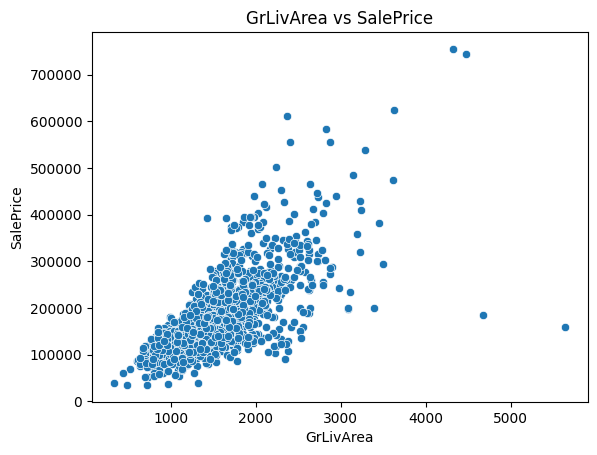

In [4]:
# Your code here - continuous numeric predictor
#see types of columns
print (ames.dtypes.value_counts())

#view numeric columns
numeric_cols = ames.select_dtypes(include = ['int64', 'float64']).columns
print ("Numeric columns: \n", numeric_cols)

import matplotlib.pyplot as plt
import seaborn as sns

#continuous numeric
sns.scatterplot(data=ames, x='GrLivArea', y='SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.show()


### Discrete Numeric Predictor

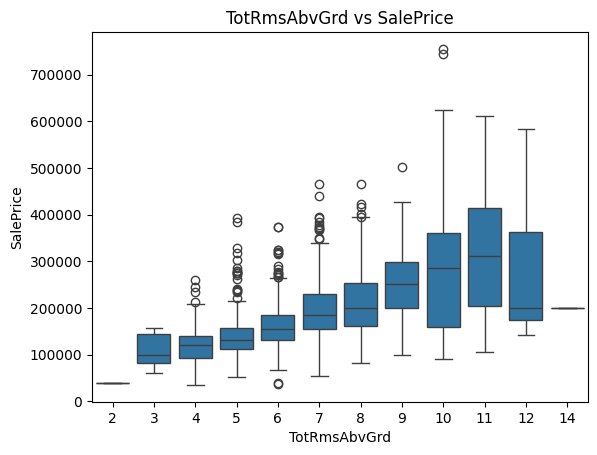

In [5]:
#Discrete Numeric
sns.boxplot(data=ames, x='TotRmsAbvGrd', y='SalePrice')
plt.title('TotRmsAbvGrd vs SalePrice')
plt.show()

### String Categorical Predictor

String columns: 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


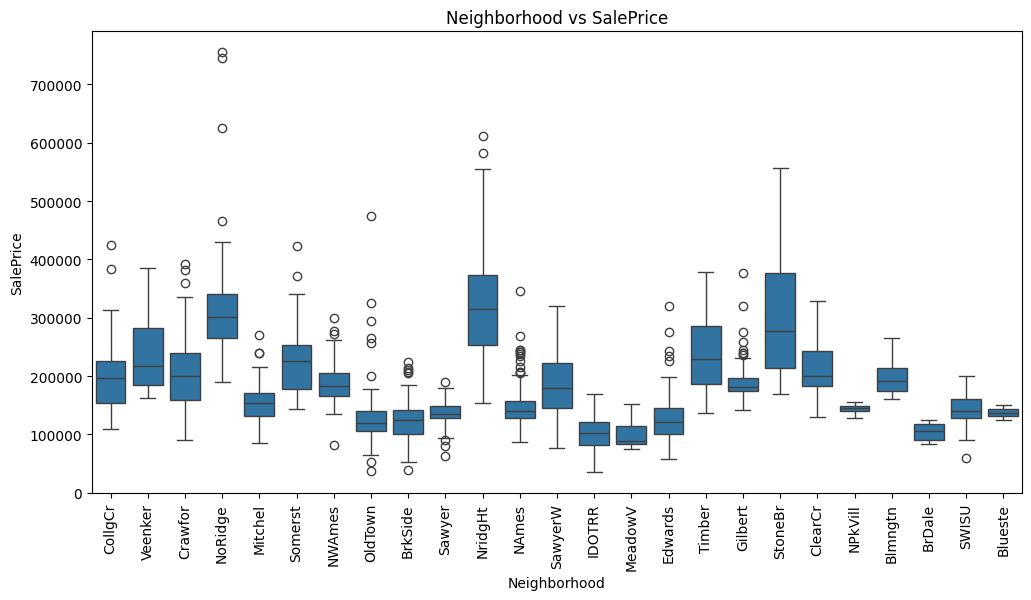

In [6]:
# Your code here - string categorical predictor
object_cols = ames.select_dtypes(include = ['object']).columns
print ("String columns: \n", object_cols)

plt.figure(figsize=(12,6))
sns.boxplot(data=ames, x='Neighborhood', y='SalePrice')
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation=90)
plt.show()

### Discrete Categorical Predictor

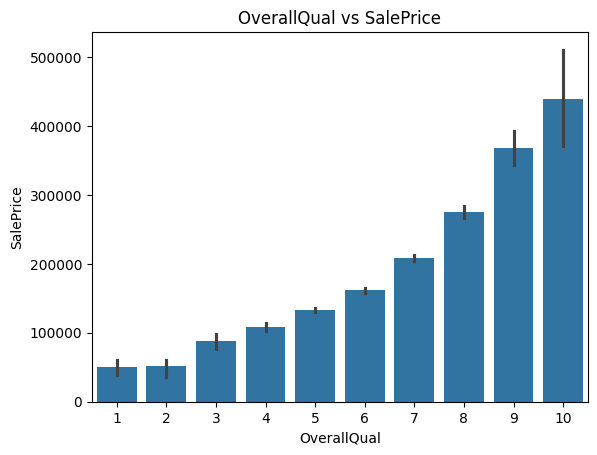

In [7]:
sns.barplot(data=ames, x='OverallQual', y='SalePrice')
plt.title('OverallQual vs SalePrice')
plt.show()

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [13]:
# Your code here - prepare X and y, including one-hot encoding
X= ames [['OverallQual', 'TotRmsAbvGrd', 'GrLivArea']]
y= ames ['SalePrice']

X = pd.get_dummies(ames[['OverallQual', 'TotRmsAbvGrd', 'GrLivArea']], columns=['OverallQual'], drop_first=True)


In [14]:
# Your answer here - which category or categories were dropped?
dropped_category = sorted(ames['OverallQual'].unique())[0]
print("Dropped category:", dropped_category)


Dropped category: 1


In [20]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

X = X.astype('float64')
y = y.astype('float64')

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

# Step 7: Print results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     418.7
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:56:59   Log-Likelihood:                -17500.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1448   BIC:                         3.509e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.135e+04   2.77e+04      0.

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

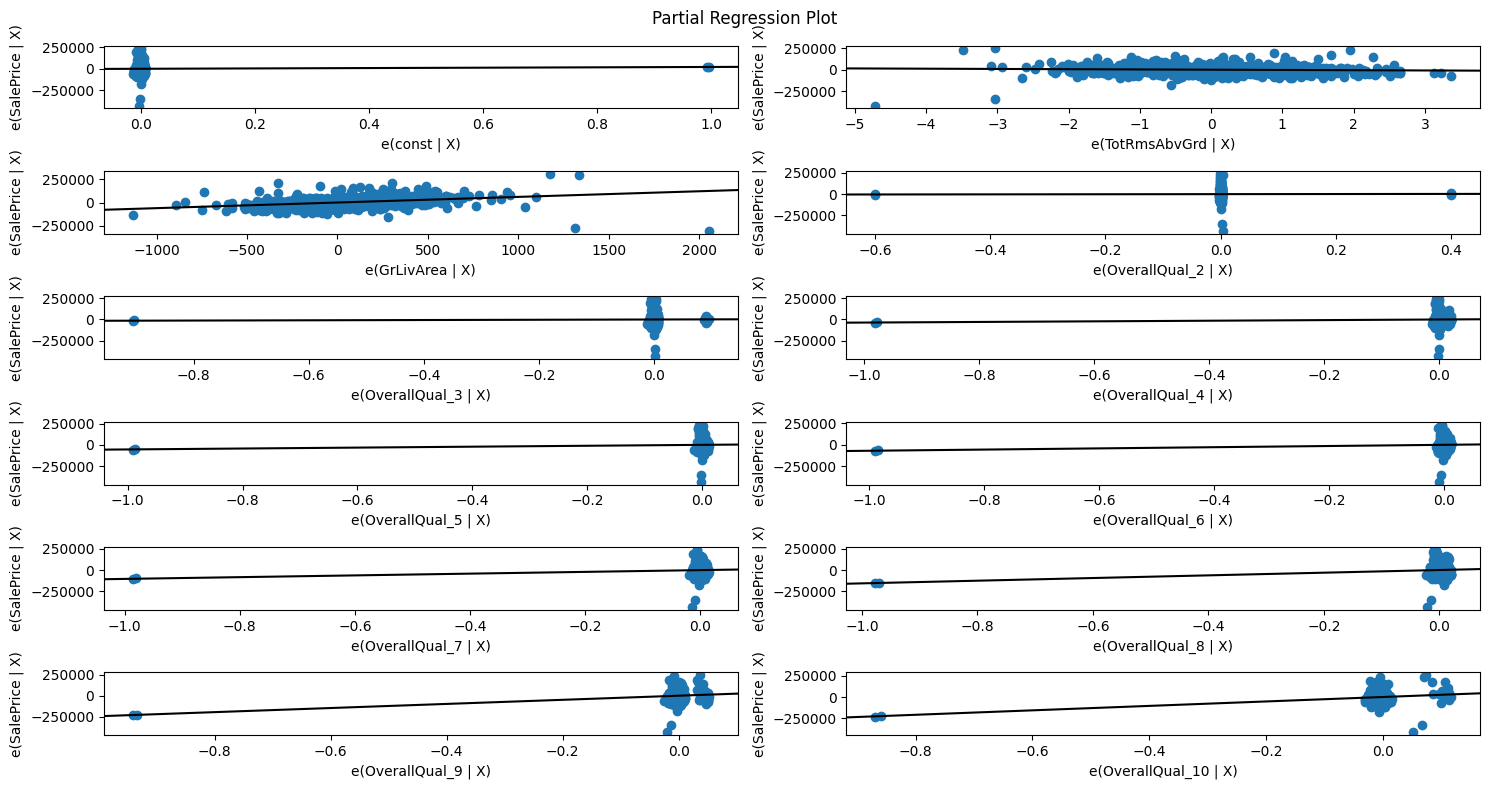

In [21]:
# Your code here - create partial regression plots
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(15, 8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [23]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error

# Step 1: Get predictions
y_pred = model.predict(X_with_const)

# Step 2: Calculate MAE
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

from sklearn.metrics import mean_squared_error
import numpy as np
# Step 1: Get predictions
y_pred = model.predict(X_with_const)

# Step 2: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 25868.045528935192
Root Mean Squared Error (RMSE): 38841.184458136595


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

# Your answer here
Model results:
Your model explains about 76% of the variance in SalePrice, which is quite strong for a regression on real-world housing data.
F-statistic p-value = 0.00:  
* The model is statistically significant — at least one of your predictors is contributing useful information.  
coefficients:
GrLivArea is highly significant (p < 0.001) and positively correlated with SalePrice: Every additional square foot adds about $60.74 to price.  
TotRmsAbvGrd is negatively correlated:
 * Effect size: -$2,932.78
 * Significant at p = 0.01
OverallQual: Higher quality levels (7–10) show strong, statistically significant increases in SalePrice:  
* a level 10 quality home adds ~$262,500 compared to baseline

Error-Based Metrics:  
These are fairly reasonable, but RMSE being much larger than MAE suggests some large individual errors (outliers)

From the plots:

* Linear relationships seem decent for GrLivArea, OverallQual_7–10.
* There's clustering at 0 for many categorical variables — not surprising given dummy encoding.
* TotRmsAbvGrd shows a more scattered effect, which aligns with its weak performance.

Next Steps:
* Address multicollinearity
* Investigate for outliers

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [25]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train-test split (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Model performance
print("Train R²:", lr.score(X_train, y_train))
print("Test R²:", lr.score(X_test, y_test))

Train R²: 0.7443503814025727
Test R²: 0.7990618161670217


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.